#Problema 3

##a)

In [1]:
import numpy as np
from numpy.linalg import matrix_power, solve
import matplotlib.pyplot as plt


class Sistema:

    def __init__(self, N, I, alpha):
        self.N = N
        self.I = I
        self.alpha = alpha
        # P es la matriz de transición
        self.P = [[self.P_ij(i, j) for j in range(I, N + 1)]  for i in range(I, N + 1)]

    # Función que calcula probabilidad de transición de un estado i a otro j:
    def P_ij(self, i, j):
        if j == i:
            probability = (1 - self.alpha) * 2 * (i/self.N * (self.N - i)/(self.N - 1)) + i/self.N * (i - 1)/(self.N-1) + (self.N - i)/self.N * (self.N - 1 - i)/(self.N - 1)
        elif j == i + 1:
            probability = self.alpha * 2 * i/self.N * (self.N - i)/(self.N - 1)
        else:
            probability = 0
        return probability

##b)

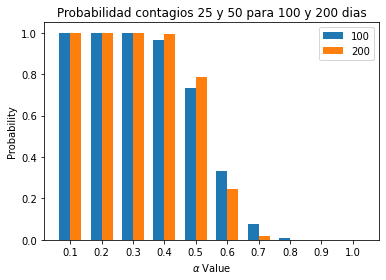

In [2]:
alpha_x = [i/10 for i in range(1, 11)]
probability_100 = []
probability_200 = []
for x in alpha_x:
    instance = Sistema(100, 25, x)
    matriz_transicion = np.array(instance.P)
    matriz_100 = matrix_power(matriz_transicion, 100)
    matriz_200 = matrix_power(matriz_transicion, 200)
    probability_100.append(sum(matriz_100[0][0:26]))
    probability_200.append(sum(matriz_200[0][0:51]))

bar_width = 0.35
fig, ax = plt.subplots()
br1 = np.arange(len(alpha_x))
br2 = [x + bar_width for x in br1]

bar_100 = ax.bar(br1, probability_100, width = bar_width, label="100")
bar_200 = ax.bar(br2, probability_200, width = bar_width, label="200")
ax.set_xlabel(r'$\alpha$ Value')
ax.set_ylabel('Probability')
ax.set_title('Probabilidad contagios 25 y 50 para 100 y 200 dias')
ax.set_xticks(br1 + bar_width / 2)
ax.set_xticklabels(alpha_x)
ax.legend()
plt.savefig('P3_b.pdf')
plt.show()

##c

519.9789350612327


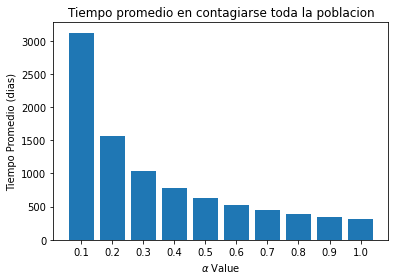

In [3]:
parte_c = Sistema(100, 25, 0.6)
A = [[0 for i in range(len(parte_c.P))] for j in range(len(parte_c.P))]
B = [-1 for i in range(len(parte_c.P))]
for i, esperanza in enumerate(parte_c.P):
    A[i][i] += -1
    for j, p_ij in enumerate(esperanza):
        if j == (parte_c.N - parte_c.I):
            pass
        else:
            A[i][j] += parte_c.P[i][j]

A = np.array(A)
B = np.array(B)
x = solve(A, B)  # Lista de la forma [ E[T(1,75)], E[T(2,75)], E[T(3,75)], ... , E[T(75,75)] ]
print(x[0])  # Demoraría 519.9789350612327 días en promedio en ir desde 25 contagiados a 75 contagiados


tiempo_promedio = []
for alpha in alpha_x:
    parte_c = Sistema(100, 25, alpha)
    A = [[0 for i in range(len(parte_c.P))] for j in range(len(parte_c.P))]
    B = [-1 for i in range(len(parte_c.P))]
    for i, esperanza in enumerate(parte_c.P):
        A[i][i] += -1
        for j, p_ij in enumerate(esperanza):
            if j == (parte_c.N - parte_c.I):
                pass
            else:
                A[i][j] += parte_c.P[i][j]

    A = np.array(A)
    B = np.array(B)
    x = solve(A, B)
    tiempo_promedio.append(x[0])

fig, ax = plt.subplots()
br1 = np.arange(len(alpha_x))

bar_c = ax.bar(br1, tiempo_promedio)
ax.set_xlabel(r'$\alpha$ Value')
ax.set_ylabel('Tiempo Promedio (dias)')
ax.set_title('Tiempo promedio en contagiarse toda la poblacion')
ax.set_xticks(br1)
ax.set_xticklabels(alpha_x)
plt.savefig('P3_c.pdf')
plt.show()

##d)

In [4]:
class Sistema_Medicos:

    def __init__(self, N, I, M, alpha, beta):
        self.N = N
        self.I = I
        self.M = M
        self.alpha = alpha
        self.beta = beta
        # P es la matriz de transición
        self.P = [[self.P_ij(i, j) for j in range(N - M + 1)]  for i in range(N - M + 1)]

    # Función que calcula probabilidad de transición de un estado i a otro j:
    def P_ij(self, i, j):
        civiles = self.N - self.M
        if j == i:
            probability = (civiles - i)/self.N * (civiles - 1 - i)/(self.N - 1) + \
                          self.M/self.N * (self.M - 1)/(self.N - 1) + \
                          i/self.N * (i - 1)/(self.N - 1) + \
                          2 * (civiles - i)/self.N * self.M/(self.N - 1) + \
                          2 * (civiles - i)/self.N * i/(self.N - 1) * (1 - self.alpha) + \
                          2 * i/self.N * self.M/(self.N - 1) * (1 - self.beta)
        elif j == i + 1:
            probability = self.alpha * 2 * i/self.N * (civiles - i)/(self.N - 1)
        elif j == i - 1:
            probability = self.beta * 2 * i/self.N * self.M/(self.N - 1)
        else:
            probability = 0
        return probability

##e)

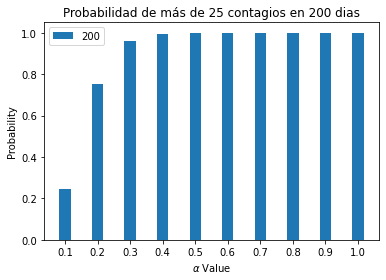

In [5]:
alpha_x = [i/10 for i in range(1, 11)]
probability_200_alpha = []
f_0 = [0 for i in range(101)]; f_0[25] = 1  # No hay distribucion limite, por lo que se necesita un
                                            # estado inicial, en este caso se parte siempre de 25 contagiados.
for x in alpha_x:
    instance = Sistema_Medicos(120, 25, 20, x, 0.5)
    matriz_transicion = np.array(instance.P)
    matriz_200 = matrix_power(matriz_transicion, 200)
    f_200 = np.dot(f_0, matriz_200)
    probability_200_alpha.append(sum(f_200[26:101]))

bar_width = 0.35
fig, ax = plt.subplots()
br1 = np.arange(len(alpha_x))
bar_200_alpha = ax.bar(br1, probability_200_alpha, width = bar_width, label="200")
ax.set_xlabel(r'$\alpha$ Value')
ax.set_ylabel('Probability')
ax.set_title('Probabilidad de más de 25 contagios en 200 dias')
ax.set_xticks(br1)
ax.set_xticklabels(alpha_x)
ax.legend()
plt.savefig('P3_e.pdf')
plt.show()

##f)

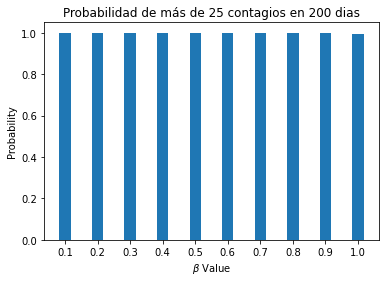

In [6]:
beta_x = [i/10 for i in range(1, 11)]
probability_200_beta = []
f_0 = [0 for i in range(101)]; f_0[25] = 1  # No hay distribucion limite, por lo que se necesita un
                                            # estado inicial, en este caso se parte siempre de 25 contagiados.
for x in beta_x:
    instance = Sistema_Medicos(120, 25, 20, 0.6, x)
    matriz_transicion = np.array(instance.P)
    matriz_200 = matrix_power(matriz_transicion, 200)
    f_200 = np.dot(f_0, matriz_200)
    probability_200_beta.append(sum(f_200[26:101]))

fig, ax = plt.subplots()
br2 = np.arange(len(beta_x))
bar_200_beta = ax.bar(br2, probability_200_beta, width = bar_width)
ax.set_xlabel(r'$\beta$ Value')
ax.set_ylabel('Probability')
ax.set_title('Probabilidad de más de 25 contagios en 200 dias')
ax.set_xticks(br2)
ax.set_xticklabels(beta_x)
plt.savefig('P3_f.pdf')
plt.show()